In [4]:
import pandas as pd


file_path = 'data/cinemaTicket_Ref.csv'
data = pd.read_csv(file_path)

In [5]:

data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [6]:
data['date'] = pd.to_datetime(data['date'])

time_series = data.groupby('date')['total_sales'].sum().reset_index()

time_series.set_index('date', inplace=True)

In [4]:
time_series.head()

,total_sales
date,
2018-02-21,32030000
2018-02-23,180000
2018-03-14,2202300484
2018-03-15,4479008974
2018-03-16,5386645987


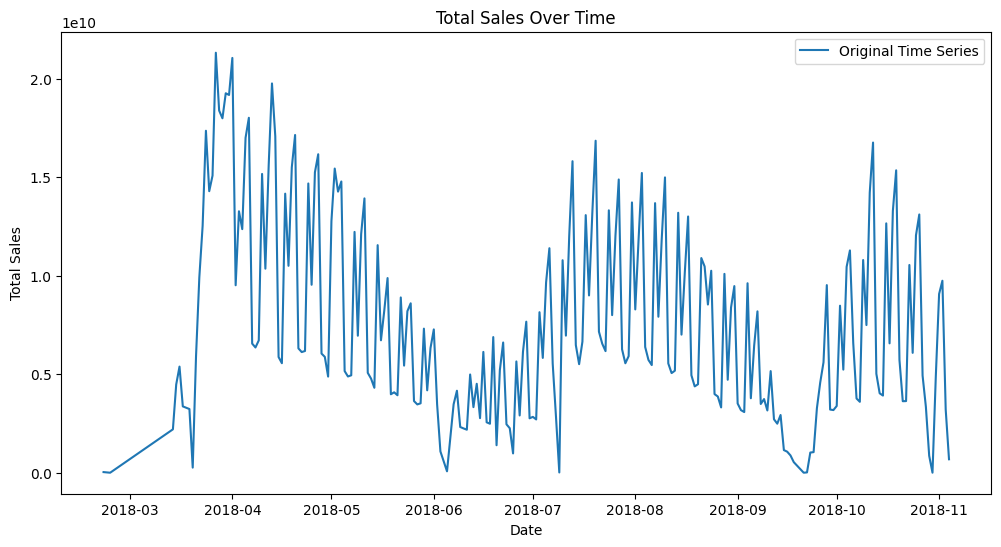

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an ex

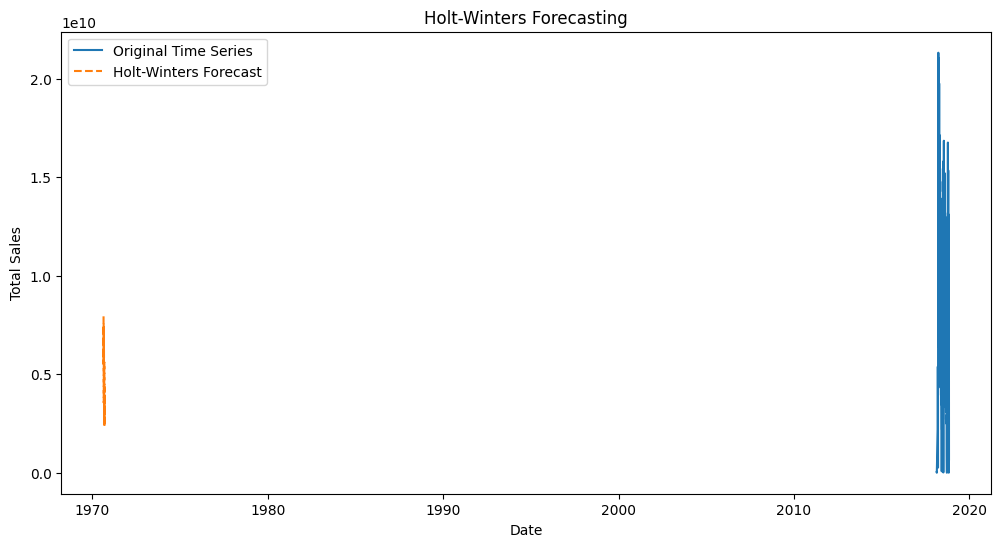

In [6]:

hw_model = ExponentialSmoothing(
    time_series,
    trend='add',
    seasonal='add',
    seasonal_periods=20
).fit()


forecast_steps = 20
hw_forecast = hw_model.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [7]:
hw_forecast

234    7.938760e+09
235    5.523407e+09
236    7.575760e+09
237    5.975867e+09
238    3.549666e+09
239    4.358760e+09
240    6.059543e+09
241    7.107268e+09
242    5.662908e+09
243    6.198721e+09
244    4.868073e+09
245    2.472565e+09
246    2.764501e+09
247    3.942938e+09
248    2.603723e+09
249    5.049856e+09
250    5.607267e+09
251    3.371779e+09
252    2.324765e+09
253    4.384573e+09
dtype: float64